In [1]:
import numpy as np


In [2]:
def get_parametres(img):
  height = img.shape[0] // 3 # разделение на 3
  delta_width = int(img.shape[1] * 0.1) #для удаления рамок
  delta_height = int(height * 0.1)
  #print('height, delta_width, delta_height = ', height, delta_width, delta_height)
  return height, delta_width, delta_height

In [3]:
#порядок B-G-R
def get_channels(img):
  height, delta_width, delta_height = get_parametres(img)
  blue_ch = img[delta_height : height - delta_height, delta_width: -delta_width]
  green_ch = img[height + delta_height : 2 * height - delta_height, delta_width: -delta_width]
  red_ch = img[2 * height + delta_height : 3 * height - delta_height, delta_width: -delta_width]
  return np.dstack((blue_ch, green_ch, red_ch))

In [4]:
pre_par = np.array([[100, 0], [-1, 50]])
print(pre_par)
pre_par.T[np.absolute(pre_par) < 10]

[[100   0]
 [ -1  50]]


array([-1,  0])

In [5]:
def fourier_matching(img1, img2):
  c = np.fft.ifft2(np.fft.fft2(img1) * np.conj(np.fft.fft2(img2)))
  #c[15:c.shape[0]-15, :] = 0
  #c[:, 15:c.shape[1]-15] = 0
  argmax = c.argmax()
  pre_par = np.unravel_index(argmax, c.shape)
  par = np.array([pre_par, pre_par - np.array([c.shape[0], c.shape[1]])])
 #print(par)
  #print(par.T[np.absolute(par.T) < c.shape[0] * 0.1])
  return par.T[np.absolute(par.T) < c.shape[0] * 0.1]

In [6]:
def roll_img(img, blue, red):
  rolled = img.copy()
  rolled[:,:, 0] = np.roll(rolled[:,:, 0], blue[0], axis = 0)
  rolled[:,:, 0] = np.roll(rolled[:,:, 0], blue[1], axis = 1)

  rolled[:,:, 2] = np.roll(rolled[:,:, 2], red[0], axis = 0)
  rolled[:,:, 2] = np.roll(rolled[:,:, 2], red[1], axis = 1)
  return rolled[..., ::-1]

In [7]:
def align(img, green):
  img_ch = get_channels(img)
  y_b, x_b = fourier_matching(img_ch[..., 1], img_ch[..., 0])
  y_r, x_r = fourier_matching(img_ch[..., 1], img_ch[..., 2])
  #print('y_b, x_b = ', (y_b, x_b))
  #print('y_r, x_r = ', (y_r, x_r))

  height, delta_width, delta_height = get_parametres(img)

  b_row = green[0] - height - y_b
  b_col = green[1] - x_b
  r_row = green[0] + height - y_r
  r_col = green[1] - x_r
  return roll_img(img_ch, (y_b, x_b), (y_r, x_r)), (b_row, b_col), (r_row, r_col)

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as img

(9705, 3770)


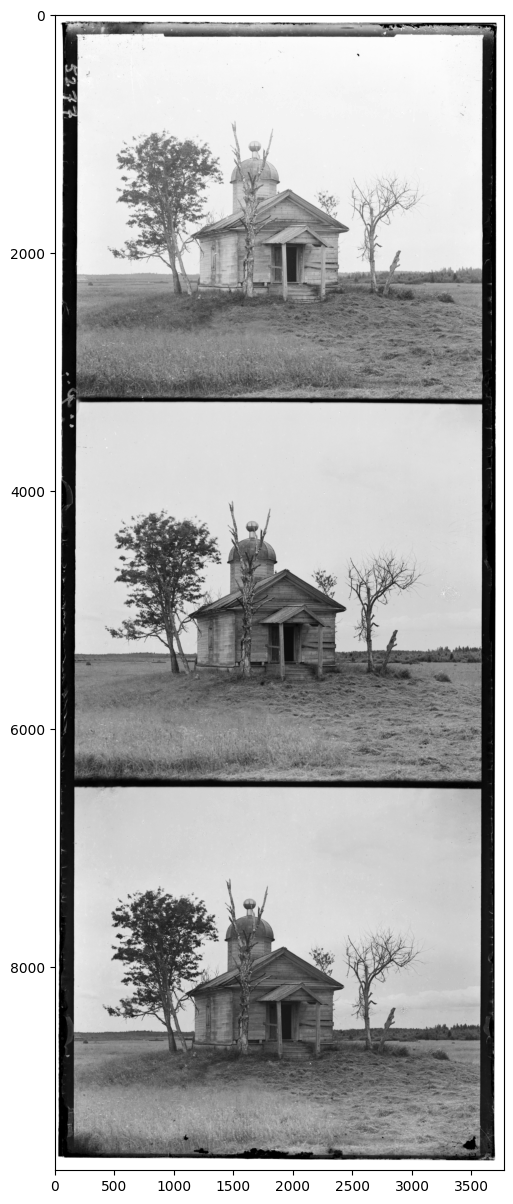

In [10]:
im = plt.imread('/content/drive/MyDrive/16_test_img_input/img.png')

plt.figure(figsize = (39, 15))
plt.imshow(im, cmap ='gray')
print(im.shape)

#plt.scatter(1272, 1979)
#plt.scatter(1241, 8369)
#plt.scatter(1266, 5175)

In [ ]:
channels = get_channels(im)
print(channels.shape)
#channels= np.roll(channels, 50, axis = 0)
plt.imshow(channels[..., ::-1])

In [ ]:
test = channels.copy()
test[:,:, 0] = np.roll(test[:,:, 0], -3, axis = 0)
test[:,:, 0] = np.roll(test[:,:, 0], 1, axis = 1)

test[:,:, 2] = np.roll(test[:,:, 2], 9, axis = 0)
test[:,:, 2] = np.roll(test[:,:, 2], -1, axis = 1)

plt.imshow(test[..., ::-1])

In [12]:
new_image, blue_coord, red_coord = align(im, (4982, 2087))

height, delta_width, delta_height =  3235 377 323
[[2544 2995]
 [ -45  -21]]
[-45 -21]
[[   60    21]
 [-2529 -2995]]
[60 21]
y_b, x_b =  (-45, -21)
y_r, x_r =  (60, 21)
height, delta_width, delta_height =  3235 377 323


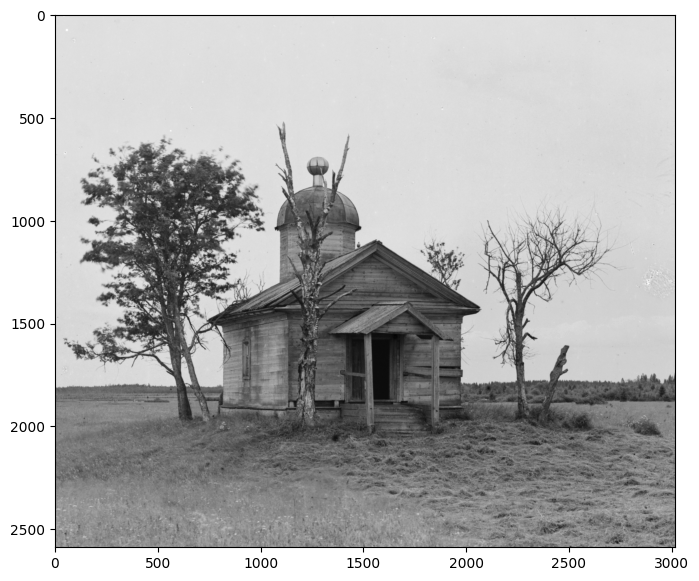

In [13]:
plt.figure(figsize = (8, 12))
plt.imshow(new_image[..., 1], cmap ='gray')


In [14]:
blue_coord

(1792, 2108)

In [15]:
red_coord

(8157, 2066)

In [ ]:
plt.imshow(new_image)

In [ ]:
plt.figure(figsize = (39, 15))
plt.imshow(im, cmap ='gray')
print(im.shape)

#plt.scatter(236, 103)
#plt.scatter(234, 871)
#plt.scatter(235, 490)


plt.scatter(blue_coord[1], blue_coord[0])
plt.scatter(red_coord[1], red_coord[0])
plt.scatter(237, 508)

In [ ]:
plt.figure(figsize = (39, 15))
plt.imshow(im, cmap ='gray')
print(im.shape)

#plt.scatter(236, 103)
#plt.scatter(234, 871)
#plt.scatter(235, 490)


plt.scatter(2279, 995)
plt.scatter(2247, 7387)
plt.scatter(2255, 4201)

In [ ]:
np.sum(np.absolute(np.asarray(red_coord) - np.array([871, 234]))) + np.sum(np.absolute(np.asarray(blue_coord) - np.array([103, 236])))